### Dataset related information
### This dataset contains house sale prices for King County, which includes Seattle. 
### It includes homes sold between May 2014 and May 2015.
### 19 house features plus the price and the id columns, along with 21613 observations.

### Step 1 : Import Libraries and read the data set

In [1]:
# Read the CSV File into a Data frame for the housing related data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Declaration Page - Include all library declarations in this section
# For matrix computation# For m 
import numpy as np
# For data manipulation 
import pandas as pd
# For 2D plotting 
from matplotlib import pyplot as plt
# For modelling using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
# for corelation chart
import seaborn as sns

In [4]:
housing_df = pd.read_csv('kc_house_data (1).csv')

In [5]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
housing_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
housing_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
### OBSERVATIONS OF DATA:
### The data set has mostly all numeric values
### "date" column is of object type and it has Date concatenated with time
### none of the variables have blank or NULL or NA values. Hence data set is complete for validation
### Data normalisation might be required for date column in modeling stage

### Step 2 : Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [9]:
# in The data set it is observed that the date column is a combination of date and time.
# We will split that column in date and time for ease of processing

In [10]:
housing_df['newdate'] = housing_df['date'].str[:8] 

In [11]:
housing_df['newtime'] = housing_df['date'].str[8:] 

In [12]:
housing_df['newtime'].value_counts()

T000000    21613
Name: newtime, dtype: int64

In [13]:
housing_df['newdate'].value_counts()

20140623    142
20140625    131
20140626    131
20140708    127
20150427    126
20150325    123
20150428    121
20140709    121
20150422    121
20150414    121
20140624    120
20150421    119
20140826    117
20141028    117
20140520    116
20140714    116
20140701    115
20150429    114
20140820    114
20140617    113
20150408    112
20140729    112
20140528    111
20140716    111
20140805    110
20150423    110
20150327    109
20140825    109
20140811    107
20140620    107
           ... 
20141129      3
20150315      3
20141012      3
20140704      2
20140511      2
20141221      2
20141207      2
20150510      2
20140809      2
20141128      2
20141115      2
20140907      2
20150201      2
20141227      2
20140824      2
20141011      2
20150215      1
20150308      1
20150110      1
20140830      1
20150527      1
20150131      1
20140803      1
20141102      1
20140727      1
20140517      1
20150117      1
20150524      1
20150515      1
20141130      1
Name: newdate, Length: 3

In [14]:
# Observation shows that the time stamp is T000000 across all values
# so from a model point of view we dont need the date column and the time column
# we will retain new date for analysis purposes
# id is also not required in the analysis

In [15]:
### Corelation heat map is used further to understand the correlation

In [16]:
X_chk = housing_df[['newdate', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [17]:
y = housing_df['price']

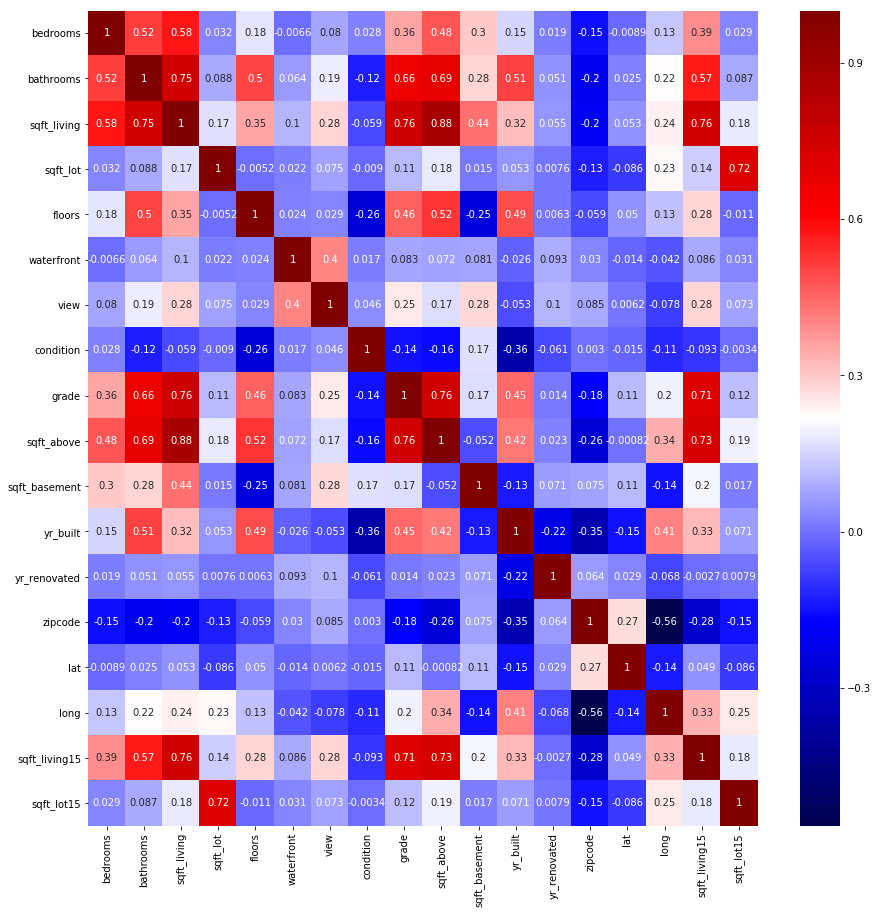

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X_chk.corr(), cmap='seismic',annot=True,ax=ax)
plt.show()

### Step 3 : State your insights.

In [19]:
### sqft_living,sqft_living15,sqft_above,grade seem to be highly correlated to each other
### sqft_living alone could be sufficient for modelling purposed to start with
### 0.75 is taken as a threshold to do feature selection basis simple binary analysis

In [20]:
### We will create a new dataframe excluding the corelated variables and also include the new date column in it

In [21]:
X = housing_df[['newdate', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long','sqft_lot15']]

### Step 4 : Build a linear regression model to predict the house prices

In [22]:
model = LinearRegression()

In [23]:
# We will distribute the data sets into train test models

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [26]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
model.score(X_test,y_test)

0.6471849075017593

### Step 5 : Try to find out important features or create new features to improve the performance for your model.

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [29]:
### We will use the regression method to identify 10 best features from the data set

In [30]:
X.shape

(21613, 16)

In [31]:
#Select 10 best Features
best_fit = SelectKBest(score_func=f_regression, k=10)

In [32]:
best_fit.fit(X,y)

SelectKBest(k=10, score_func=<function f_regression at 0x1a22186378>)

In [33]:
best_fit.scores_

array([1.98768618e-01, 2.27065523e+03, 8.22894323e+03, 2.10019096e+04,
       1.75140305e+02, 1.52570614e+03, 1.65046304e+03, 4.05045898e+03,
       2.86114552e+01, 2.53150633e+03, 6.32290479e+01, 3.51074838e+02,
       6.13445184e+01, 2.24881465e+03, 1.01120709e+01, 1.47906887e+02])

In [34]:
X.columns

Index(['newdate', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15'],
      dtype='object')

In [35]:
best_fit.transform(X)

array([[3.00000e+00, 1.00000e+00, 1.18000e+03, ..., 0.00000e+00,
        0.00000e+00, 4.75112e+01],
       [3.00000e+00, 2.25000e+00, 2.57000e+03, ..., 4.00000e+02,
        1.99100e+03, 4.77210e+01],
       [2.00000e+00, 1.00000e+00, 7.70000e+02, ..., 0.00000e+00,
        0.00000e+00, 4.77379e+01],
       ...,
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 0.00000e+00,
        0.00000e+00, 4.75944e+01],
       [3.00000e+00, 2.50000e+00, 1.60000e+03, ..., 0.00000e+00,
        0.00000e+00, 4.75345e+01],
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 0.00000e+00,
        0.00000e+00, 4.75941e+01]])

### Step 6 : Use appropriate cross validations techniques to find out 
### the best predictor parameters and best prediction.

In [36]:
### This iteration checks the linear regression model with 10 FOlds
### It scores for all columns in the X DF whihc is all 16 features

In [37]:
from sklearn.model_selection import KFold, cross_val_score

In [38]:
# We will use the KFOLD Cross validation techniques for best fitting model

In [39]:
kfold = KFold(n_splits=10, shuffle=True)

In [40]:
result = cross_val_score(model, X, y, cv=kfold)

In [41]:
result

array([0.63614595, 0.66908967, 0.68718294, 0.63380884, 0.65148123,
       0.69715927, 0.66230431, 0.67160398, 0.68275611, 0.65283891])

In [42]:
result.mean()

0.664437120695246

In [43]:
result.std()

0.020105002311623033

In [44]:
# Let us check now the accuracy of the model by selecting 10 best from the X DF
# X DF is already trimmed of variables which could be multicollinear
# Checking the result by parsing the best selected 10 variables and checking for accuracy

In [45]:
result = cross_val_score(model, best_fit.transform(X), y, cv=kfold)

In [46]:
result

array([0.62674157, 0.61283462, 0.61500335, 0.654445  , 0.64963339,
       0.65286824, 0.6335226 , 0.64581298, 0.63595911, 0.61814839])

In [47]:
result.mean()

0.6344969254012838

In [48]:
### In this iteration, we will first select the best 5 features from X DF
### Checking the result by parsing the best selected 5 variables and checking for accuracy

In [49]:
#Select 5 best Features
best_fit_5 = SelectKBest(score_func=f_regression, k=5)

In [50]:
best_fit_5.fit(X,y)

SelectKBest(k=5, score_func=<function f_regression at 0x1a22186378>)

In [51]:
result5 = cross_val_score(model, best_fit_5.transform(X), y, cv=kfold)

In [52]:
result5

array([0.53848434, 0.54991886, 0.53233558, 0.5202912 , 0.53636543,
       0.53824576, 0.56493449, 0.54456685, 0.56145667, 0.53904618])

In [53]:
result5.mean()

0.5425645347851054

In [54]:
## Lets add three more features in the core data frame and then lets see if it generates 
## improved results

In [55]:
X['newmonth'] = X['newdate'].str[4:6]

In [56]:
X['newyear'] = X['newdate'].str[:4]

In [57]:
X.head()

,newdate,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,newmonth,newyear
0,20141013,3,1.00,1180,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,5650,10,2014
1,20141209,3,2.25,2570,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,7639,12,2014
2,20150225,2,1.00,770,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,8062,02,2015
3,20141209,4,3.00,1960,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393,5000,12,2014
4,20150218,3,2.00,1680,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045,7503,02,2015


In [58]:
X[["newmonth", "newyear"]] = X[["newmonth", "newyear"]].apply(pd.to_numeric)

In [59]:
X.head()

,newdate,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,newmonth,newyear
0,20141013,3,1.00,1180,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,5650,10,2014
1,20141209,3,2.25,2570,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,7639,12,2014
2,20150225,2,1.00,770,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,8062,2,2015
3,20141209,4,3.00,1960,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393,5000,12,2014
4,20150218,3,2.00,1680,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045,7503,2,2015


In [60]:
X.dtypes

newdate           object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_lot15         int64
newmonth           int64
newyear            int64
dtype: object

In [61]:
X['propage'] = X['newyear'] - X['yr_built']

In [62]:
X.head()

,newdate,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,newmonth,newyear,propage
0,20141013,3,1.00,1180,5650,1.0,0,0,3,0,1955,0,98178,47.5112,-122.257,5650,10,2014,59
1,20141209,3,2.25,2570,7242,2.0,0,0,3,400,1951,1991,98125,47.7210,-122.319,7639,12,2014,63
2,20150225,2,1.00,770,10000,1.0,0,0,3,0,1933,0,98028,47.7379,-122.233,8062,2,2015,82
3,20141209,4,3.00,1960,5000,1.0,0,0,5,910,1965,0,98136,47.5208,-122.393,5000,12,2014,49
4,20150218,3,2.00,1680,8080,1.0,0,0,3,0,1987,0,98074,47.6168,-122.045,7503,2,2015,28


In [63]:
### Three new featurs have been added to the main data frame
### We can run it for 10 best features now and check accuracy

In [64]:
#Select 10 best Features
best_fit_10 = SelectKBest(score_func=f_regression, k=10)

In [65]:
best_fit_10.fit(X,y)

SelectKBest(k=10, score_func=<function f_regression at 0x1a22186378>)

In [66]:
result10 = cross_val_score(model, best_fit_10.transform(X), y, cv=kfold)

In [67]:
result10.mean()

0.6335796743557812

In [68]:
best_fit.fit(X,y)

SelectKBest(k=10, score_func=<function f_regression at 0x1a22186378>)

In [69]:
result = cross_val_score(model, X, y, cv=kfold)

In [70]:
result.mean()

0.6650332623095189

In [71]:
### All these tests show that the initial selection of features by corelation tests
### provided best accuracy. Addition of variables also did not change the accuracy
### Best Fit model as a result achieved by variables in X defined